# MCLP
$$Maximize \sum_{i \in I} w_iy_i $$
$$s.t \quad  y_i \leq \sum_{j \in N_i}x_j \quad for \, all \quad i \in I$$
$$ \sum_{j \in J}x_j = K $$
$$x_j,y_i \in {0,1} \quad for \, all \quad i \in I,j \in J$$

|문자|의미|
|-|-|
|i|수요 포인트 index|
|j|설비지역 포인트 index|
|I|수요 포인트 집합|
|J|설비지역 포인트 집합|
|K|설치해야하는 설비 개수|
|x|설비 후보 지역 중 위치 j 에 설치되면 1, 아니면 0|
|y|적어도 하나의 설비로 그 포인트가 커버되면 1, 아니면 0|
|w|입지 선정 지수=가중치|

## [공간최적화 참조 코드](https://pysal.org/spaghetti/notebooks/facility-location.html)

In [ ]:
# 한글 폰트 설치 -> 이 셀만 실행한 후 런타임 재시작해주세요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

#0. 모듈 불러오기

In [ ]:
import os
%config InlineBackend.figure_format = "retina"

In [ ]:
# scalebar 추가를 통해 그래프 가시성 확보
!pip install matplotlib-scalebar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ortools => 최적화 관련 라이브러리 
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 32.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


In [ ]:
import warnings
warnings.filterwarnings(action='ignore') #경고 메시지 무시
from IPython.display import display #print가 아닌 display()로 연속 출력
from IPython.display import HTML #출력 결과를 HTML로 생성

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 87.1 MB/s eta 0:00:00


In [ ]:
# 공간데이터 처리/분석 라이브러리 libpysal
!pip install libpysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 48.4 MB/s eta 0:00:00


In [ ]:
# shapely: 공간 데이터 전처리 및 시각화
!pip install shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# spaghetti: 공간 데이터 모델링
!pip install spaghetti

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.5 MB/s eta 0:00:00
  Created wheel for esda: filename=esda-2.4.3-py3-none-any.whl size=122782 sha256=f67d2393177cf76109b1f2d472b95a852b174d7591964ff0ac0322f5237a64a7
  Stored in directory: /root/.cache/pip/wheels/ed/88/61/8705bb427b9aeb4ded8f07eb8ea3e8cada26881368c75619cb
Successfully built esda


In [ ]:
!pip install matplotlib_scalebar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from collections import OrderedDict
import geopandas as gpd
import libpysal
from libpysal import cg, examples
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar
import numpy
import ortools
from ortools.linear_solver import pywraplp
import seaborn
import shapely
from shapely.geometry import Point
import spaghetti
import sys

%matplotlib inline

# 한글폰트
import os
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
try:
    from IPython.display import Markdown as md
except ImportError:
    pass

# Define a Class and functions

In [ ]:
## 최 중요 함수
class FacilityLocationModel:
    """Solve a facility location optimization model

    Parameters
    ----------
    name : str
        Problem model name; must also be defined as a class method.
    cij : numpy.ndarray
        cost matrix from origins (index of i) to destination (index of j).
        Default is None.
    ai : numpy.ndarray # ==> 요게 가중치
        Client weight vector. Default is None.
    s : float # ==> 반경
        service radius. Default is None.
    p : int # ==> 후보지역 개수
        Density of facilities to site. Default is None.
    write_lp : str
        file name (and path) of the LP file to write out.
    print_sol : bool
        print select results. Default is True.

    Methods
    -------
    build_lscp : build location set covering problem
    build_pmp : build p-median problem
    build_pcp : build p-center problem
    build_mclp : build maximal covering location problem
    add_vars : add variables to a model
    add_constrs : add contraints to a model
    add_obj : add an objective function to a model
    optimize : solve a model
    record_decisions : record optimal decision variables
    non_obj_vals : record non-objective values stats (eg. percent covered)
    print_results : print selected results

    Attributes
    ----------
    model : ortools.linear_solver.pywraplp.Solver
        proxy of <Swig Object of type 'operations_research::MPSolver *'
    n_cli : int
        total client sites
    r_cli : range
        iterable of client sites
    n_fac : int
        total candidate facility sites
    r_fac : range
        iterable of candidate facility sites
    aij : numpy.ndarray
        binary coverage matrix from cij (within s service radius)
    sij : numpy.ndarray
        demand weighted cost matrix as (ai * cij).
    fac_vars : dict
        facility decision variables
    cli_vars : dict
        client decision variables
    W : ortools.linear_solver.pywraplp.Variable
        minimized maximum variable in the p-center problem formulation
    lp_formulation : str
        linear programming formulation of the model
    solve_minutes : float
        solve time in minutes
    obj_val : int or float
        model objective value
    fac2cli : dict
        facility to client relationship lookup
    cli2fac : dict
        client to facility relationship lookup
    fac2iloc : dict
        facility to dataframe index location lookup
    n_cli_uncov : int
        count of client location outside the service radius
    cli2ncov : dict
        client to covered by count lookup
    ncov2ncli : dict
        covered by count to client count lookup
    mean_dist :
        mean distance per person to the assigned facility
    perc_served :
        percentage of weighted clients covered in `s`
    """

    def __init__(
        self, name, ai=None, cij=None, s=None, p=None, write_lp=None, print_sol=True
    ):
        # Set model information
        self.name = name
        # create a solver instance
        solver_instance = pywraplp.Solver.CBC_MIXED_INTEGER_PROGRAMMING
        # instantiate a model
        self.model = pywraplp.Solver(self.name, solver_instance)

        # Set parameters and indices
        # facility parameter
        if p:
            self.p = p
        # client count and range
        self.cij = cij
        self.n_cli = cij.shape[0]
        self.r_cli = range(self.n_cli)
        # facility count and range
        self.n_fac = self.cij.shape[1]
        self.r_fac = range(self.n_fac)
        # demand parameter
        if ai is not None:
            self.ai = ai
            self.ai_sum = ai.sum()
            # weighted demand
            try:
                self.sij = self.ai * self.cij
            except ValueError:
                self.ai = self.ai.values.reshape(self.n_cli, 1)
                self.sij = self.ai * self.cij
        # if the model has a service radius parameter
        if s:
            self.s = s
            # binary coverage matrix from cij
            self.aij = numpy.zeros(self.cij.shape)
            self.aij[self.cij <= self.s] = 1.0

        # Set decision variables, constraints, and objective function
        try:
            getattr(self, "build_" + self.name)()
        except:
            raise AttributeError(self.name, "not a defined location model.")

        # solve
        self.optimize(write_lp=write_lp)
        # records seleted decision variables
        self.record_decisions()
        # record non-objective values stats (eg. percent covered)
        self.non_obj_vals()
        # print results
        if print_sol:
            self.print_results()

    def build_lscp(self):
        """ Integer programming formulation of the Location Set Covering Problem.
        Originally Published:
            Toregas, C. and ReVelle, Charles. 1972.
            Optimal Location Under Time or Distance Constraints.
            Papers of the Regional Science Association. 28(1):133 - 144.
        """
        # Decision Variables
        self.add_vars()
        # Constraints
        self.add_constrs(constr=1)  # set coverage constraints
        # Objective Function
        self.add_obj()

    def build_pmp(self):
        """Integer programming formulation of the p-median Problem.
        Originally Published:
            S. L. Hakimi. 1964. Optimum Locations of Switching Centers and
            the Absolute Centers and Medians of a Graph. Operations Research.
            12 (3):450-459.
        Adapted from:
                -1-
            ReVelle, C.S. and Swain, R.W. 1970. Central facilities location.
            Geographical Analysis. 2(1), 30-42.
                -2-
            Toregas, C., Swain, R., ReVelle, C., Bergman, L. 1971. The Location
            of Emergency Service Facilities. Operations Research. 19 (6),
            1363-1373.
                - 3 -
            Daskin, M. (1995). Network and discrete location: Models, algorithms,
            and applications. New York: John Wiley and Sons, Inc.
        """
        # Decision Variables
        self.add_vars()
        # Constraints
        self.add_constrs(constr=2)  # assignment constraints
        self.add_constrs(constr=3)  # facility constraint
        self.add_constrs(constr=4)  # opening constraints
        # Objective Function
        self.add_obj()

    def build_pcp(self):
        """Integer programming formulation of the p-center Problem.
        Originally Published:
            S. L. Hakimi. 1964. Optimum Locations of Switching Centers and
            the Absolute Centers and Medians of a Graph. Operations Research.
            12 (3):450-459.
        Adapted from:
            Daskin, M. (1995). Network and discrete location: Models, algorithms,
            and applications. New York: John Wiley and Sons, Inc.
        """
        # Decision Variables
        self.add_vars()
        # Constraints
        self.add_constrs(constr=2)  # assignment constraints
        self.add_constrs(constr=3)  # facility constraint
        self.add_constrs(constr=4)  # opening constraints
        self.add_constrs(constr=5)  # minimized maximum constraints
        # Objective Function
        self.add_obj()

    def build_mclp(self):
        """Integer programming formulation of the Maximal Covering Location Problem.
        Originally Published:
            Church, R. L and C. ReVelle. 1974. The Maximal Covering Location
            Problem. Papers of the Regional Science Association. 32:101-18.
        """
        # Decision Variables
        self.add_vars()
        # Constraints
        self.add_constrs(constr=3)  # facility constraint
        self.add_constrs(constr=6)  # maximal coverage constraints
        # Objective Function
        self.add_obj()

    def add_vars(self):
        """Add variables to a model."""
        # facility decision variables
        self.fac_vars = {j: self.model.IntVar(0, 1, "y[%i]" % (j)) for j in self.r_fac}
        # client decision variables
        if self.name == "mclp":
            self.cli_vars = {
                (i): self.model.IntVar(0, 1, "x[%i]" % (i)) for i in self.r_cli
            }
        if self.name == "pmp" or self.name == "pcp":
            self.cli_vars = {
                (i, j): self.model.IntVar(0, 1, "x[%i,%i]" % (i, j))
                for i in self.r_cli
                for j in self.r_fac
            }
        # minimized maximum variable
        if self.name == "pcp":
            self.W = self.model.NumVar(0, self.model.infinity(), "W")

    def add_constrs(self, constr=None):
        """ Add constraints to a model.
        (1) set coverage constraints
                y1 + x2 >= 1
                x1 + x3 >= 1
                x2 >= 1
        (2) assignment constraints
                x1_1 + x1_2 + x1_3 = 1
        (3) facility constraints
                y1 + y2 + y3 = p
        (4) opening constraints
                - x1_1 + y1 >= 0
                - x2_1 + y1 >= 0
                - x3_1 + y1 >= 0
        (5) minimax constraints
                cost1_1*x1_1 + cost1_2*x1_2 + cost1_3*x1_3 - W <= 0
        (6) maximal coverage constraints
                - x1 + y1 + y3 >= 0
                - x2 + y4 >= 0
        Parameters
        ----------
        constr : int {1, 2, 3, 4, 5, 6}
            Contraint type to add to model. See above for explanation.
            Default is None.
        """
        # 1 - set covering constraints
        if constr == 1:
            for i in self.r_cli:
                self.model.Add(
                    self.model.Sum(
                        [self.aij[i, j] * self.fac_vars[j] for j in self.r_fac]
                    )
                    >= 1
                )
        # 2 - assignment constraints
        elif constr == 2:
            for i in self.r_cli:
                self.model.Add(
                    self.model.Sum([self.cli_vars[i, j] for j in self.r_fac]) == 1
                )
        # 3 - facility constraint
        elif constr == 3:
            self.model.Add(
                self.model.Sum([self.fac_vars[j] for j in self.r_fac]) == self.p
            )
        # 4 - opening constraints
        elif constr == 4:
            for i in self.r_cli:
                for j in self.r_fac:
                    self.model.Add(self.fac_vars[j] - self.cli_vars[i, j] >= 0)
        # 5 - minimax constraints
        elif constr == 5:
            for i in self.r_cli:
                self.model.Add(
                    self.model.Sum(
                        [self.cij[i, j] * self.cli_vars[i, j] for j in self.r_fac]
                    )
                    <= self.W
                )
        # 6 - max coverage constraints
        elif constr == 6:
            for i in self.r_cli:
                self.model.Add(
                    self.model.Sum(
                        [self.aij[i, j] * self.fac_vars[j] for j in self.r_fac]
                    )
                    >= self.cli_vars[i]
                )

    def add_obj(self):
        """Add an objective function to a model."""
        if self.name == "lscp":
            self.model.Minimize(self.model.Sum([self.fac_vars[j] for j in self.r_fac]))

        elif self.name == "pmp":
            obj = [
                self.sij[i, j] * self.cli_vars[i, j]
                for i in self.r_cli
                for j in self.r_fac
            ]
            self.model.Minimize(self.model.Sum(obj))

        elif self.name == "pcp":
            self.model.Minimize(self.W)

        elif self.name == "mclp":
            obj = [self.ai.flatten()[i] * self.cli_vars[i] for i in self.r_cli]
            self.model.Maximize(self.model.Sum(obj))

    def optimize(self, write_lp=False):
        """ Solve the model.
        Parameters
        ----------
        write_lp : bool
            write out the linear programming formulation
        """

        def _redirect_to_file(self, text):
            """ Write out the model in linear programming format.
            Parameters
            ----------
            text : str
                full lp formulation in str format
            """
            original = sys.stdout
            sys.stdout = open(self.name + ".lp", "w")
            print(text)
            sys.stdout = original

        self.model.Solve()
        # linear programming formulation
        if write_lp:
            self.lp_formulation = self.model.ExportModelAsLpFormat(True)
            self._redirect_to_file(self.lp_formulation)
        # WallTime() in milliseconds
        self.solve_minutes = self.model.WallTime() * 1.66667e-5
        self.obj_val = self.model.Objective().Value()

    def record_decisions(self):
        """Record decision variable relationship folowing optimization."""
        # facility-to-dataframe index location lookup
        self.fac2iloc = {v.name(): k for k, v in self.fac_vars.items()}
        # client-to-dataframe index location lookup
        self.cli2iloc = {}
        # facility-to-client lookup
        self.fac2cli = {}

        # record client/service relationships
        for j in self.r_fac:
            if self.fac_vars[j].solution_value() > 0:
                jvar = self.fac_vars[j].name()
                self.fac2cli[jvar] = []
                for i in self.r_cli:
                    ivar = None
                    if self.name == "lscp":
                        if self.aij[i, j] > 0:
                            ivar = "x[%i]" % i
                            self.fac2cli[jvar].append(ivar)
                    elif self.name == "mclp":
                        if self.cli_vars[i].solution_value() > 0:
                            if self.aij[i, j] > 0:
                                ivar = self.cli_vars[i].name()
                                self.fac2cli[jvar].append(ivar)
                    else:
                        if self.cli_vars[i, j].solution_value() > 0:
                            ivar = self.cli_vars[i, j].name()
                            ivar = ivar.split(",")[0] + "]"
                            self.fac2cli[jvar].append(ivar)
                    if ivar:
                        self.cli2iloc[ivar] = i

        # client-to-facility lookup
        self.cli2fac = {}
        for cv in list(self.cli2iloc.keys()):
            self.cli2fac[cv] = []
            for k, v in self.fac2cli.items():
                if cv in v:
                    self.cli2fac[cv].append(k)

        # count of uncovered clients
        self.n_cli_uncov = self.n_cli - len(self.cli2iloc.keys())

        # clients of clients covered by n facilities
        if self.name == "lscp" or self.name == "mclp":
            self.cli2ncov = {}
            for c, fs in self.cli2fac.items():
                self.cli2ncov[c] = len(fs)
            most_coverage = max(self.cli2ncov.values())
            self.ncov2ncli = {}
            for cov_count in range(most_coverage + 1):
                if cov_count == 0:
                    self.ncov2ncli[cov_count] = self.n_cli_uncov
                    continue
                if not cov_count in list(self.cli2ncov.keys()):
                    self.ncov2ncli[cov_count] = 0
                for c, ncov in self.cli2ncov.items():
                    if ncov >= cov_count:
                        self.ncov2ncli[cov_count] += 1

    def non_obj_vals(self):
        """Record non-objective values."""
        if self.name == "pmp":
            self.mean_dist = self.obj_val / float(self.ai_sum)

        if self.name == "mclp":
            self.perc_served = (self.obj_val / float(self.ai_sum)) * 100.0

    def print_results(self):
        """Print select results."""
        print("Solve Time:", self.solve_minutes, "minutes")

        # solve time and objective value
        if self.name == "lscp":
            u1 = "facilities needed for total coverage within a "
            u2 = "%f meter service radius" % self.s
        if self.name == "pmp":
            u1 = "total weighted distance with "
            u2 = "%i selected facilities" % self.p
        if self.name == "pcp":
            u1 = "worst case distance with "
            u2 = "%i selected facilities" % self.p
        if self.name == "mclp":
            u1 = "residents within %f meters of " % self.s
            u2 = "%i selected facilities" % self.p
        units = u1 + u2

        print("Obj. Value:", self.obj_val, units)

        if self.name == "pmp":
            print("Mean weighted distance per", "person: %f" % self.mean_dist)
        if self.name == "mclp":
            print(
                "Percent of %i" % self.ai_sum, "clients covered: %f" % self.perc_served
            )

        # coverage values
        if self.name == "lscp" or self.name == "mclp":
            for ncov, ncli in self.ncov2ncli.items():
                if ncov == 0:
                    print("--- %i clients are not covered" % ncli)
                else:
                    if ncov == 1:
                        sp = "y"
                    else:
                        sp = "ies"
                    print(
                        "--- %i clients are covered" % ncli,
                        "by %i" % ncov,
                        "facilit" + sp,
                    )


In [ ]:
def add_results(model, cli_df, fac_df, print_solution=False):
    """Add decision variable relationships to a dataframe.
    Parameters
    ----------
    model : ortools.linear_solver.pywraplp.Solver
        proxy of <Swig Object of type 'operations_research::MPSolver *'
    cli_df : gpd.GeoDataFrame
        GeoDataFrame of client locations
    fac_df : gpd.GeoDataFrame
        GeoDataFrame of facility locations
    print_solution : bool
        print out solution decision variables. Default is False.
    Returns
    -------
    cli_df : gpd.GeoDataFrame
        updated client locations
    fac_df : gpd.GeoDataFrame
        updated facility locations
    """
    col_name = model.name + "_sol"
    fillers = [[cli_df, "cli2fac"], [fac_df, "fac2cli"]]
    for df, attr in fillers:
        df[col_name] = df["dv"].map(getattr(model, attr))
        df[col_name].fillna("closed", inplace=True)
    if print_solution:
        selected = fac_df[fac_df[col_name] != "closed"]
        for idx in selected.index:
            print("")
            print(selected.loc[idx, "dv"], "serving:", selected.loc[idx, col_name])
    return cli_df, fac_df

In [ ]:
def plotter(
    fig=None,
    base=None,
    plot_aux=None,
    buffered=None,
    model=None,
    pt1_size=None,
    pt2_size=None,
    plot_res=None,
    save_fig=False,
    title=None,
    figsize=(10, 10),
): # ==> 이미지 만드는 함수
    """ Top-level scenario plotter for location analytics.
    Parameters
    ----------
    fig : matplotlib.figure.Figure
        complete figure to plot. Default is None.
    base : matplotlib.axes._subplots.AxesSubplot
        individual axis to plot. Default is None.
    plot_aux : dict
        model data parameters dataframes to plot keyed by
        descriptive names. Default is None.
    plot_res : dict
        model data results dataframes to plot keyed by
        descriptive names. Default is None.
    buffered : see
        buffer distance from roads segments in `plot_base`.
        Default is None.
    pt1_size : float or float
        size of points to plot. `pt1_size` should always be the
        larger between `pt2_size` and `pt1_size`. Default is None.
    pt2_size : float or float
        size of points to plot. Default is None.
    model : ortools.linear_solver.pywraplp.Solver
        proxy of <Swig Object of type 'operations_research::MPSolver *'
    title : str
        plot title. Default is None.
    figsize : tuple
        Figure size for plot. Default is (12,12).
    save_fig : bool
        Default is False.
    Returns
    -------
    add_to_legend : list
        items to add to legend
    """
    for_multiplot = True
    if not fig and not base:
        for_multiplot = False
        fig, base = plt.subplots(1, 1, figsize=figsize)

    # add title
    if not for_multiplot:
        if model:
            title += " - " + model.name
        base.set_title(title, size=20)
    else:
        base.set_title(model.name, size=20)

    # plot non-results data
    if plot_aux:
        for k, df in plot_aux.items():
            if k == "streets":
                df.plot(ax=base, lw=2, edgecolor="k", zorder=1,color='dimgray')
            if k == "buffer":
                df.plot(ax=base, facecolor="y", lw=0.25, alpha=0.25, zorder=1)
            if k == "cli_tru":
                if plot_res:
                    df = df[df[model.name + "_sol"] == "closed"]
                    psize = pt2_size / 6.0
                    pcolor = "k"
                else:
                    n_cli = df.shape[0]
                    psize = pt1_size
                    pcolor = "r"
                df.plot(ax=base, markersize=psize, edgecolor="k", facecolor=pcolor)
            if k == "fac_tru":
                if plot_res:
                    df = df[df[model.name + "_sol"] == "closed"]
                    psize = pt2_size
                    pcolor = "k"
                    pmarker = "*"
                else:
                    n_cli = df.shape[0]
                    psize = pt1_size
                    pcolor = "b"
                    pmarker = "o"
                df.plot(
                    ax=base,
                    markersize=psize,
                    edgecolor="k",
                    facecolor=pcolor,
                    marker=pmarker,
                )
                n_fac = df.shape[0]
            if k == "cli_snp":
                df.plot(
                    ax=base,
                    markersize=pt2_size,
                    edgecolor="k",
                    facecolor="r",
                    alpha=0.75,
                )
            if k == "fac_snp":
                df.plot(
                    ax=base,
                    markersize=pt2_size,
                    edgecolor="k",
                    facecolor="b",
                    alpha=0.75,
                )
        add_to_legend = list(plot_aux.keys())
    else:
        add_to_legend = None

    # plot results data
    if plot_res:
        dv_colors = dv_colorset(plot_res["fac_var"].dv)
        # facilities
        df = plot_res["fac_var"][plot_res["fac_var"][model.name + "_sol"] != "closed"]
        alpha = 1.0 / float(len(df.dv))
        if alpha > 0.5:
            alpha = 0.5
        # decision variable info for legend
        dvs_to_leg = {}
        # plot facilities
        for dv in df.dv:
            fac = df[df.dv == dv]
            fac.plot(
                ax=base,
                marker="*",
                markersize=pt1_size * 3.0,
                alpha=0.8,
                zorder=3,
                edgecolor="k",
                facecolor=dv_colors[dv],
            )
            # update decision variable info with set color
            dvs_to_leg[dv] = {"facecolor": dv_colors[dv]}
        # plot clients & service areas
        for f, c in model.fac2cli.items():
            fc = plot_res["cli_var"][plot_res["cli_var"].dv.isin(c)]
            fc.plot(
                ax=base,
                markersize=50,
                edgecolor="k",
                facecolor=dv_colors[f],
                alpha=alpha,
                zorder=2,
            )
            # update decision variable info with set client counts
            dvs_to_leg[f].update({"clients": fc.shape[0]})
            # create service area polygon
            service_area = concave_hull(df, fc, f)
            service_area.plot(
                ax=base, edgecolor="k", alpha=0.2, facecolor=dv_colors[f], zorder=1
            )
    else:
        dvs_to_leg = None

    if not model:

        class _ShellModel:
            """Object to mimic `model` when not present."""

            def __init__(self, plot_aux):
                try:
                    self.n_cli = plot_aux["cli_tru"].shape[0]
                    try:
                        self.n_fac = plot_aux["fac_tru"].shape[0]
                    except KeyError:
                        pass
                except KeyError:
                    pass

        try:
            model = _ShellModel(plot_aux)
        except (TypeError, KeyError):
            model = None

    if not for_multiplot:
        # create legend patches
        patches = create_patches(
            model=model,
            for_multiplot=for_multiplot,
            pt1_size=pt1_size,
            pt2_size=pt2_size,
            buffered=buffered,
            legend_aux=add_to_legend,
            dvs_to_leg=dvs_to_leg,
        )
        add_legend(patches, for_multiplot=for_multiplot)
    add_north_arrow(base)
    add_scale(base)

    if save_fig:
        plt.savefig(model.name + ".png")

    # if for a multiplot explicityly return items to add to legend
    if for_multiplot:
        return add_to_legend

In [ ]:
def multi_plotter(
    models,
    plot_aux=None,
    plot_res=None,
    select=None,
    title=None,
    figsize=(14, 14),
    shape=(2, 2),
):
    """plot multiple base axes as one figure
    Parameters
    ----------
    models : list
        solved model objects
    select : dict
        facility-to-selection count lookup.
    shape : tuple
        dimension for subplot array. Default is (2,2).s
    plot_aux : see plotter()
    plot_res : see plotter()
    title : see plotter()
    figsize : see plotter()
    """
    pt1_size, pt2_size = 300, 60
    # convert list of models to array
    mdls = numpy.array(models).reshape(shape)
    fig, axarr = plt.subplots(
        mdls.shape[0], mdls.shape[1], figsize=figsize, sharex="col", sharey="row"
    )
    # add super title to subplot array
    plt.suptitle(title, fontsize=30)
    fig.subplots_adjust(hspace=0.1, wspace=0.005, top=0.925)
    # create each subplot
    for i in range(mdls.shape[0]):
        for j in range(mdls.shape[1]):
            add_to_legend = plotter(
                base=axarr[i, j],
                plot_aux=plot_aux,
                plot_res=plot_res,
                model=mdls[i, j],
                pt1_size=pt1_size,
                pt2_size=pt2_size,
            )
            axarr[i, j].set_aspect("equal")
    add_to_legend = set(add_to_legend)
    # decision variable color set
    dv_colors = dv_colorset(plot_res["fac_var"].dv)
    dvs_to_leg = {f: dv_colors[f] for m in models for f in m.fac2cli.keys()}
    # set ordered dict of {iloc:fac_var, color, x-selected}
    # *** models[0] can be any of the solved models
    dvs_to_leg = {
        models[0].fac2iloc[k]: (k, v, select[k]) for k, v in dvs_to_leg.items()
    }
    dvs_to_leg = OrderedDict(sorted(dvs_to_leg.items()))
    # create legend patches
    patches = create_patches(
        model=None,
        pt1_size=pt1_size,
        pt2_size=pt2_size,
        legend_aux=add_to_legend,
        dvs_to_leg=dvs_to_leg,
        for_multiplot=True,
    )
    add_legend(patches, for_multiplot=True)

In [ ]:
def add_north_arrow(base):
    """add a north arrow to an axes
    Parameters
    ----------
    base : see plotter()
    """
    arw = "rarrow, pad=0.25"
    bbox_props = dict(boxstyle=arw, fc="w", ec="k", lw=2, alpha=0.75)
    base.text(
        221200,
        267200,
        "      z    ",
        bbox=bbox_props,
        fontsize="large",
        fontweight="heavy",
        ha="center",
        va="center",
        rotation=90,
    )

In [ ]:
def add_scale(base):
    """add a scale bar to an axes
    Parameters
    ----------
    base : see plotter()
    """
    scalebar = ScaleBar(1, units="m", location="lower left")
    base.add_artist(scalebar)
    base.set(xticklabels=[], xticks=[], yticklabels=[], yticks=[]);

In [ ]:
def create_patches(
    model=None,
    pt1_size=None,
    pt2_size=None,
    buffered=None,
    legend_aux=None,
    dvs_to_leg=None,
    for_multiplot=False,
):
    """create all patches to add to the legend.
    Parameters
    ----------
    for_multiplot : bool
        for a single plot (True), or multiplot (False).
        Default is False.
    model : see plotter()
    pt1_size : see plotter()
    pt2_size : see plotter()
    buffered : see plotter()
    legend_aux : see plotter()
    dvs_to_leg : see plotter()
    Returns
    -------
    patches : list
        legend handles matching plotted items
    """
    if pt1_size:
        ms1 = float(pt1_size) / 6.0
    if pt2_size:
        ms2 = float(pt2_size) / 8.0
    # streets -- always plot
    strs = mlines.Line2D([], [], color="k", linewidth=2, alpha=1, label="Streets")
    # all patches to add to legend
    patches = [strs]
    # non-results data
    if legend_aux:
        if "buffer" in legend_aux:
            label = "Street buffer (%sm)" % buffered
            strbuff = mpatches.Patch(
                edgecolor="None", facecolor="y", linewidth=2, alpha=0.5, label=label
            )
            patches.append(strbuff)
        if "cli_tru" in legend_aux:
            try:
                if dvs_to_leg:
                    pcolor = "k"
                    msize = ms2 / 3.0
                    plabel = "Uncovered Households " + "($n$=%i)" % model.n_cli_uncov
                else:
                    pcolor = "r"
                    msize = ms1
                    plabel = "Households ($n$=%i)" % model.n_cli
                cli_tru = mlines.Line2D(
                    [],
                    [],
                    color=pcolor,
                    marker="o",
                    ms=msize,
                    linewidth=0,
                    alpha=1,
                    markeredgecolor="k",
                    label=plabel,
                )
                patches.append(cli_tru)
            except AttributeError:
                pass
        if "fac_tru" in legend_aux:
            if dvs_to_leg:
                pcolor = "k"
                msize = ms2
                pmarker = "*"
                no_fac = model.n_fac - len(list(model.fac2cli.keys()))
                plabel = "Unselected Facilities ($n$=%i)" % no_fac
            else:
                pcolor = "b"
                msize = ms1
                pmarker = "o"
                plabel = "Little Free Library candidates" + "($n$=%i)" % model.n_fac
            fac_tru = mlines.Line2D(
                [],
                [],
                color=pcolor,
                marker=pmarker,
                ms=msize,
                markeredgecolor="k",
                linewidth=0,
                alpha=1,
                label=plabel,
            )
            patches.append(fac_tru)
        if "cli_snp" in legend_aux:
            label = "Households snapped to network"
            cli_snp = mlines.Line2D(
                [],
                [],
                color="r",
                marker="o",
                ms=ms2,
                linewidth=0,
                alpha=1,
                markeredgecolor="k",
                label=label,
            )
            patches.append(cli_snp)
        if "fac_snp" in legend_aux:
            label = "LFL candidates snapped to network"
            fac_snp = mlines.Line2D(
                [],
                [],
                color="b",
                marker="o",
                ms=ms2,
                markeredgecolor="k",
                linewidth=0,
                alpha=1,
                label=label,
            )
            patches.append(fac_snp)
    # results data for single plot
    if dvs_to_leg and not for_multiplot:
        # add facility, client, and service area patches to legend
        for k, v in dvs_to_leg.items():
            fdv_label = "Little Free Library %s" % k
            fdv = mlines.Line2D(
                [],
                [],
                color=v["facecolor"],
                marker="*",
                ms=ms1 / 2.0,
                markeredgecolor="k",
                linewidth=0,
                alpha=0.8,
                label=fdv_label,
            )
            cdv_label = "Households served by %s " % k + "($n$=%i)" % v["clients"]
            cdv = mlines.Line2D(
                [],
                [],
                color=v["facecolor"],
                marker="o",
                ms=ms1 / 6.0,
                markeredgecolor="k",
                linewidth=0,
                alpha=0.5,
                label=cdv_label,
            )
            serv_label = "%s service area" % k
            serv = mpatches.Patch(
                edgecolor="k",
                facecolor=v["facecolor"],
                linewidth=2,
                alpha=0.25,
                label=serv_label,
            )
            patches.extend([fdv, cdv, serv])
    # results data for multiplot
    if dvs_to_leg and for_multiplot:
        for idx, (k, v, n) in dvs_to_leg.items():
            fdv = mlines.Line2D(
                [],
                [],
                color=v,
                marker="*",
                ms=ms1 / 2,
                markeredgecolor="k",
                linewidth=0,
                alpha=0.8,
                label="%s ($n$=%i)" % (k, n),
            )
            patches.append(fdv)
    return patches

In [ ]:
def dv_colorset(dvs):
    """decision variables color set
    Parameters
    ---------
    dvs : gpd.GeoSeries
        facility decision variables
    Returns
    -------
    dv_colors : dict
        decision variable to set color lookup
    """
    dv_colors = [
        "firebrick",
        "silver",
        "mediumseagreen",
        "blueviolet",
        "aqua",
        "crimson",
        "cyan",
        "limegreen",
        "snow",
        "mintcream",
        "lemonchiffon",
        "lightcoral",
        "peachpuff",
        "mediumvioletred",
        "salmon",
        "rebeccapurple",
        "rebeccapurple",
        "ivory",
        "lavenderblush",
        "deeppink",
        "darkmagenta",
        "olive",
        "indigo",
        "cornsilk",
        "cornflowerblue",
        "red",
        "cadetblue",
        'plum',
        'springgreen',
        'dodgerblue',
        'palevioletred',
        'hotpink',
        'darkviolet',
        'mediumslateblue',
        'navy',
        'midnightblue',
        'cornflowerblue',
        'aliceblue',
        'steelblue',
        'darkcyan',
        'teal',
        'darkcyan',
        'azure',
        'aquamarine',
        'mintcream',    
    ]
    

    dv_colors = {dv: dv_colors[idx] for idx, dv in enumerate(dvs)}
    return dv_colors

In [ ]:
def get_buffer(in_data, buff=50): # ==> 시각화 함수
    """ gpd.GeoDataFrame should be in a meters projection.
    Parameters
    ----------
    in_data : gpd.GeoDataFrame
        GeoDataFrame of a shapefile representing a road network.
    buff : int or float
        Desired buffer distance. Default is 50 (meters).
    Returns
    -------
    out_data : gpd.GeoDataFrame
        Single polygon of the unioned street buffers.
    """
    b1 = in_data.buffer(buff)  # Buffer
    ub = b1.unary_union  # Buffer Union
    b2 = gpd.GeoSeries(ub)
    out_data = gpd.GeoDataFrame(b2, crs=in_data.crs, columns=["geometry"])
    return out_data

In [ ]:
def add_legend(patches, for_multiplot=False):
    
    '''Add a legend to a plot
    Parameters
    ----------
    patches : list
        legend handles matching plotted item
    for_multiplot : create_patches'''
    
    if for_multiplot:
        anchor = (1.1, 1.65)
    else:
        anchor = (1.005, 1.016)
    legend = plt.legend(
        handles=patches,
        loc="upper left",
        fancybox=True,
        framealpha=0.85,
        bbox_to_anchor=anchor,
        fontsize="x-large",
        labelspacing=1.5,
        borderpad=2.
    )
    legend.get_frame().set_facecolor("white")

### 픽셀 사이즈 떄문에 에러 발생시켜서 사용하지 않음
```
def add_legend(patches, for_multiplot=False):
    
    Add a legend to a plot
    Parameters
    ----------
    patches : list
        legend handles matching plotted items
    for_multiplot : create_patches
    
    if for_multiplot:
        anchor = (1.1, 1.65)
    else:
        anchor = (1.005, 1.016)
    legend = plt.legend(
        handles=patches,
        loc="upper left",
        fancybox=True,
        framealpha=0.85,
        bbox_to_anchor=anchor,
        fontsize="x-large",
        labelspacing=1.5,
        borderpad=2.
    )
    legend.get_frame().set_facecolor("white")
```

## Utilizing libpysal.cg.alpha_shapes

In [ ]:
def concave_hull(fac_df, cli_df, f, smoother=10):
    """Create `libpysal.cg.alpha_shape_auto()` object
    for service area representation.
    Parameters
    ----------
    fac_df : gpd.GeoDataFrame
        GeoDataFrame of facility locations.
    cli_df : gpd.GeoDataFrame
        GeoDataFrame of client locations.
    f : str
        facility decision variable name.
    smoother : float or int
        buffer (meters). Default is 10.
    Returns
    -------
    ccv :  gpd.GeoDataFrame
        polygon representing facility service area
    """
    # client location coordinates
    c_array = numpy.array(
        cli_df.geometry.apply(lambda pt: [pt.x, pt.y]).squeeze().tolist()
    )
    # facility location coordinates
    f_array = numpy.array(
        fac_df[fac_df.dv == f].geometry.apply(lambda pt: [pt.x, pt.y]).squeeze()
    )
    # coordinates of all location in the set
    pts_array = numpy.vstack((c_array, f_array))
    # create alpha shape (concave hull)
    ccv = cg.alpha_shape_auto(pts_array, step=4)
    ccv = gpd.GeoDataFrame([ccv.buffer(smoother)], columns=["geometry"])
    return ccv

In [ ]:
def simulated_geo_points(in_data, needed=20, seed=0, to_file=None):
    """Generate synthetic spatial data points within an area.
    Parameters
    ----------
    in_data : gpd.GeoDataFrame
        A single polygon of the unioned street buffers.
    needed : int
        Number of points in the buffer. Default is 20.
    seed : int
        Seed for pseudo-random number generation. Default is 0.
    to_file : str
        File name for write out.
    Returns
    -------
    sim_pts : gpd.GeoDataFrame
        Points within the buffer.
    """
    geoms = in_data.geometry
    area = tuple(in_data.total_bounds)
    simulated_points_list = []
    simulated_points_all = False
    numpy.random.seed(seed)
    while simulated_points_all == False:
        x = numpy.random.uniform(area[0], area[2], 1)
        y = numpy.random.uniform(area[1], area[3], 1)
        point = Point(x, y)
        if geoms.intersects(point)[0]:
            simulated_points_list.append(point)
        if len(simulated_points_list) == needed:
            simulated_points_all = True
    sim_pts = gpd.GeoDataFrame(
        simulated_points_list, columns=["geometry"], crs=in_data.crs
    )
    if to_file:
        sim_pts.to_file(to_file + ".shp")
    return sim_pts

In [ ]:
def analytics_matrix(mdls):
    """Create stylized dataframe visualization of distance analytics.
    Parameters
    ----------
    mdls : models
        all modeling scenarios
    Returns
    -------
    df : gpd.GeoDataFrame
        distance analytics matrix
    style : pandas.io.formats.style.Styler
        style dataframe view
    """
    model_names = [m.name for m in mdls]
    boiler = " to assigned facility"
    stats = {
        "abs_min": "Absolute min dist" + boiler,
        "abs_max": "Absolute max dist" + boiler,
        "mean_means": "Mean of mean dists per client" + boiler,
        "mean_stds": "Mean of StD dists per client" + boiler,
    }
    stats_str = str(stats)
    # instantiate dataframe
    df = gpd.GeoDataFrame()
    df["stats"] = list(stats.keys())
    for n in model_names:
        df[n] = numpy.nan
    # calculate stat for each model
    for m in mdls:
        mins, maxs, stds, means = [], [], [], []
        for f, cs in m.fac2cli.items():
            rows = numpy.array([m.cli2iloc[c] for c in cs])
            col = numpy.array([m.fac2iloc[f]])
            dists = m.cij[rows[:, None], col]
            mins.append(dists.min()), maxs.append(dists.max()),
            stds.append(dists.std()), means.append(dists.mean())
        # fill cells
        calcs = [
            numpy.array(mins).min(),
            numpy.array(maxs).max(),
            numpy.array(means).mean(),
            numpy.array(stds).mean(),
        ]
        label_calc = {k: calcs[idx] for idx, k in enumerate(list(stats.keys()))}
        for k, v in label_calc.items():
            df.loc[(df["stats"] == k), m.name] = v
    # stylize
    cm = seaborn.light_palette("green", as_cmap=True, reverse=True)
    style = df.style.set_caption(stats_str).background_gradient(
        axis=1, cmap=cm, subset=model_names
    )
    return df, style

In [ ]:
def selection_matrix(mdls): 
    """create stylized dataframe visualization of selected decision variables.
    Parameters
    ----------
    mdls : models
        all modeling scenarios
    Returns
    -------
    df : gpd.GeoDataFrame
        variable selection matrix
    style : pandas.io.formats.style.Styler
        style dataframe view
    """

    def _highlight_membership(s):
        """highlight set membership in pandas.DataFrame."""
        return ["background-color: limegreen" if v == "$\in$" else "" for v in s]

    # set index and coluns in empty dataframe
    var_index = [v.name() for k, v in models[0].fac_vars.items()]
    df = gpd.GeoDataFrame(index=var_index, columns=[m.name for m in models])
    # if site was selected in a model label with
    # latex symbol for 'element of a set' ($\in$)
    for m in models:
        for f in df.index:
            if f in list(m.fac2cli.keys()):
                df.loc[f, m.name] = "$\in$"
    # label all other cells with latex ($\\notin$)
    df.fillna("$\\notin$", inplace=True)
    for idx in df.index:
        sel = df.loc[idx][df.loc[idx] == "$\in$"].shape[0]
        df.loc[idx, "$\sum$"] = sel
        df.loc[idx, "$\%$"] = (float(sel) / float(4)) * 100.0
    # stylize
    cm = seaborn.light_palette("green", as_cmap=True)
    style = df.style.apply(_highlight_membership).background_gradient(
        cmap=cm, subset=["$\sum$", "$\%$"]
    )
    return df, style


# 1. 데이터 업로드

## 1.1) 후보지: 화곡동 남서부 공시지가 최저가 입지 5개소

In [ ]:
# 현재 경로 확인
os.getcwd()
cwd = '/content/drive/MyDrive/광진구공모전'
os.chdir(cwd)

In [ ]:
candidate = pd.read_csv(cwd + '/data/processed/후보입지5개소/후보입지5개소.csv', encoding = 'utf-8')

In [ ]:
#텍스트를 geometry로
from shapely.wkt import loads
candidate.geometry_centroid = loads(candidate.geometry_centroid)

In [ ]:
# 좌표계 통일
candidate = gpd.GeoDataFrame(candidate, geometry = 'geometry_centroid', crs = 'epsg:5179')

## 1.2) 수요지: 화곡동 남서부 인근의 주요 법정동(동대문구, 성동구 포함)
(가중치: 100m 격자별 5060 여성 인구와 1인가구수 추정치의 정규분포 변환값의 합)
- 파일 불러오기
- geodf 변환

In [ ]:
demandpoints = pd.read_csv(cwd+ '/data/processed/수요지역_가중치/수요지역가중치.csv', encoding = 'utf-8')

In [ ]:
# csv파일에서는 지리정보가 단순 텍스트 형태이기 때문에 geometry 타입으로 변환 
demandpoints.geometry = loads(demandpoints.geometry)

In [ ]:
demandpoints = gpd.GeoDataFrame(demandpoints) #geodataframe으로 변형

In [ ]:
# 시각화 및 수요지역으로써 단일 지점으로 삼는 과정의 편의를 위해 지리 단위를 격자에서 중심점으로 변경
demandpoints.geometry = demandpoints.geometry.centroid

In [ ]:
# 마지막으로, geometry의 좌표계를 utm-k로 통일
demandpoints = demandpoints.set_crs('epsg:5179')

In [ ]:
demandpoints['가중치'] = demandpoints['가중치'] - demandpoints['가중치'].min() #가중치의 총합을 기준으로 하기 때문에, 음수 값을 없애줄 필요가 있다.

In [ ]:
demandpoints['가중치'].min() # 최소값이 0이 되었다.

0.0

## 1.3) 네트워크 형성을 위한 수요입지 내 도로 데이터

In [ ]:
#1. 행정동 경계를 먼저 가져오기 
dist_admin = gpd.read_file(cwd+'/data/raw/읍면동_2302/emd.shp', encoding = 'cp949')

In [ ]:
dist_target = dist_admin[dist_admin['EMD_KOR_NM'].isin(['장안동', '용답동', '송정동', '군자동', '능동', '구의동', '중곡동'])]

In [ ]:
dist_target = dist_target[dist_target['EMD_CD'].str.startswith('112')]

In [ ]:
dist_target = dist_target.set_crs('epsg:5179')

In [ ]:
# 길 가져오기
road_origin = gpd.read_file(cwd+'/data/raw/서울시도로shp_(MCLP)/Z_KAIS_TL_SPRD_MANAGE_11000.shp', encoding = 'cp949')

In [ ]:
road_origin = road_origin.to_crs('epsg:5179')

In [ ]:
road_target = gpd.sjoin(road_origin, dist_target,  predicate='within').drop('index_right', axis=1)

<Axes: >

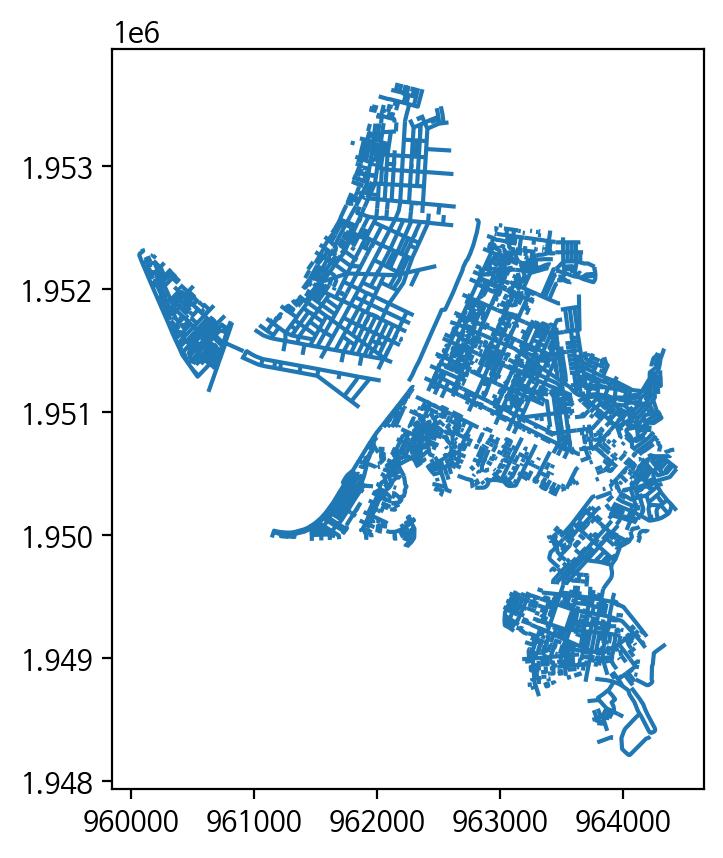

In [ ]:
road_target.plot()

# 입지모델 

### 세팅

In [ ]:
# 고객수, 필요 설치개수 = x,y
demand_count, facility_count = demandpoints.shape[0], candidate.shape[0] # 560, 3

# plot 제목
title = "joonggok_facilities"

In [ ]:
clients = demandpoints
clients["dv"] = ["x[%s]" % c for c in range(demand_count)] # dv 가 좌표

facilities = candidate
facilities["dv"] = ["y[%s]" % c for c in range(facility_count)]

display(clients.head(2))
display(facilities.head(3))

,geometry,총인구수_전체,geometry_origin,5060여성인구,EMD_KOR_NM,행정동,동별(3),1인세대 비율(행정동 기준),1인가구인구수(추산),가중치,dv
0,POINT (962850.000 1950850.000),45.0,"POLYGON ((962800 1950800, 962800 1950900, 9629...",0.0,능동,능동,능동,0.337478,15.186494,0.274199,x[0]
1,POINT (962750.000 1950350.000),97.0,"POLYGON ((962700 1950300, 962700 1950400, 9628...",19.0,능동,능동,능동,0.337478,32.735331,1.129013,x[1]


,20대인구수_남자,geometry_centroid,20대인구수_여자,30대인구수_남자,30대인구수_여자,40대인구수_남자,40대인구수_여자,50대인구수_남자,50대인구수_여자,60대인구수_남자,...,1인가구인구수(추산),공시지가,5060인구,5060여성인구,2030인구,2030_1인세대(추산),경도,위도,5060인구수,dv
0,31.0,POINT (962750.000 1951450.000),34.0,43.0,45.0,32.0,28.0,35.0,35.0,34.0,...,137.878423,2950318.05,139.0,70.0,153.0,46.983071,127.078227,37.561654,139.0,y[0]
1,25.0,POINT (962850.000 1951450.000),29.0,44.0,64.0,28.0,19.0,25.0,31.0,34.0,...,124.059873,3078136.52,119.0,60.0,162.0,49.746781,127.079359,37.561658,119.0,y[1]
2,9.0,POINT (962450.000 1951250.000),23.0,33.0,40.0,16.0,14.0,16.0,14.0,18.0,...,73.391856,3098831.05,65.0,31.0,105.0,32.243284,127.074840,37.559839,65.0,y[2]


### 모델링: 도로 기반

In [ ]:
streets = road_target
whole_area = dist_target 

In [ ]:
# 실제 도로 연결시 3분 내외 소요
ntw = spaghetti.Network(in_data = streets) # ntw는 network. 
ntw.snapobservations(clients, "clients", attribute=True) #snap == 네트워크가 있으면, 데이터를 연결시킨다
clients_snapped = spaghetti.element_as_gdf(
    ntw, pp_name="clients", snapped=True
)
ntw.snapobservations(facilities, "facilities", attribute=True) 
facilities_snapped = spaghetti.element_as_gdf(
    ntw, pp_name="facilities", snapped=True
)

# cost_matrix = ntw.allneighbordistances(
#     sourcepattern=ntw.pointpatterns["clients"],
#     destpattern=ntw.pointpatterns["facilities"],
# ) # 
# cost_matrix[:3,:3]

In [ ]:
# 4분 소요

cost_matrix = ntw.allneighbordistances(
    sourcepattern=ntw.pointpatterns["clients"],
    destpattern=ntw.pointpatterns["facilities"],
) # 
cost_matrix[:3,:3]

array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

In [ ]:
cost_matrix.shape

(845, 5)

In [ ]:
# add_to_plot = {
#     "streets": streets,
#     "buffer": streets_buffer,
#     "cli_tru": clients,
#     "fac_tru": facilities,
#     "cli_snp": clients_snapped,
#     "fac_snp": facilities_snapped,
# }
# plotter(plot_aux=add_to_plot, buffered=buff, pt1_size=60, pt2_size=10)

#### MCLP

In [ ]:
mclp = FacilityLocationModel(
    "mclp", ai=clients["가중치"], cij=cost_matrix, p=1, s=1000
)
clients, facilities = add_results(mclp, clients, facilities)

Solve Time: 0.0023666714 minutes
Obj. Value: 382.5903933796426 residents within 1000.000000 meters of 1 selected facilities
Percent of 2427 clients covered: 15.761530
--- 733 clients are not covered
--- 112 clients are covered by 1 facility


In [ ]:
# aux_to_plot = {"streets": streets, "cli_tru": clients, "fac_tru": facilities}
# res_to_plot = {"cli_var": clients, "fac_var": facilities}
# plotter(
#     plot_aux=aux_to_plot,
#     plot_res=res_to_plot,
#     pt1_size=300,
#     pt2_size=60,
#     model=mclp,
#     title=title,
# )

In [ ]:
models = [mclp]
analytics_df, analytics_display = analytics_matrix(models)
selection_df, selection_display = selection_matrix(models)
display(analytics_display)
display(selection_display)
display(facilities[facilities["mclp_sol"] != "closed"][["dv", "geometry"]])

,stats,mclp
0,abs_min,0.000000
1,abs_max,991.649854
2,mean_means,608.248907
3,mean_stds,250.729699


,mclp,$\sum$,$\%$
y[0],$\notin$,0.000000,0.000000
y[1],$\notin$,0.000000,0.000000
y[2],$\notin$,0.000000,0.000000
y[3],$\in$,1.000000,25.000000
y[4],$\notin$,0.000000,0.000000


,dv,geometry
3,y[3],"POLYGON ((963200 1951200, 963200 1951300, 9633..."


#### 결과 시각화

<Axes: >

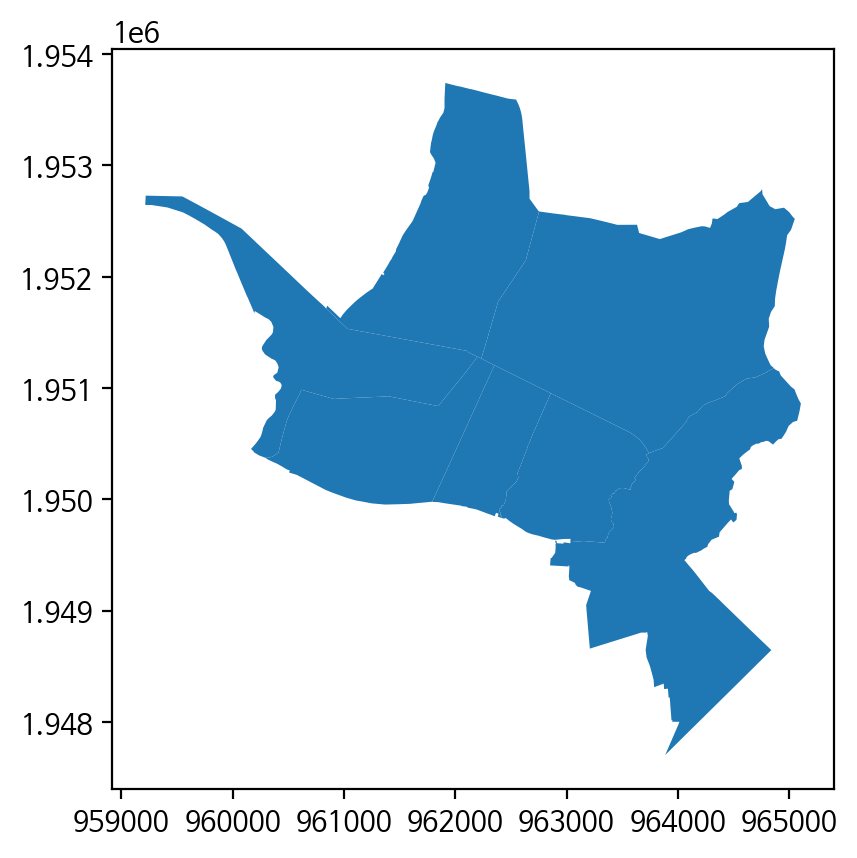

In [ ]:
whole_area.plot()

In [ ]:
target = facilities.iloc[[3]]
polygon = shapely.wkt.loads(target['geometry'])
target.geometry = polygon

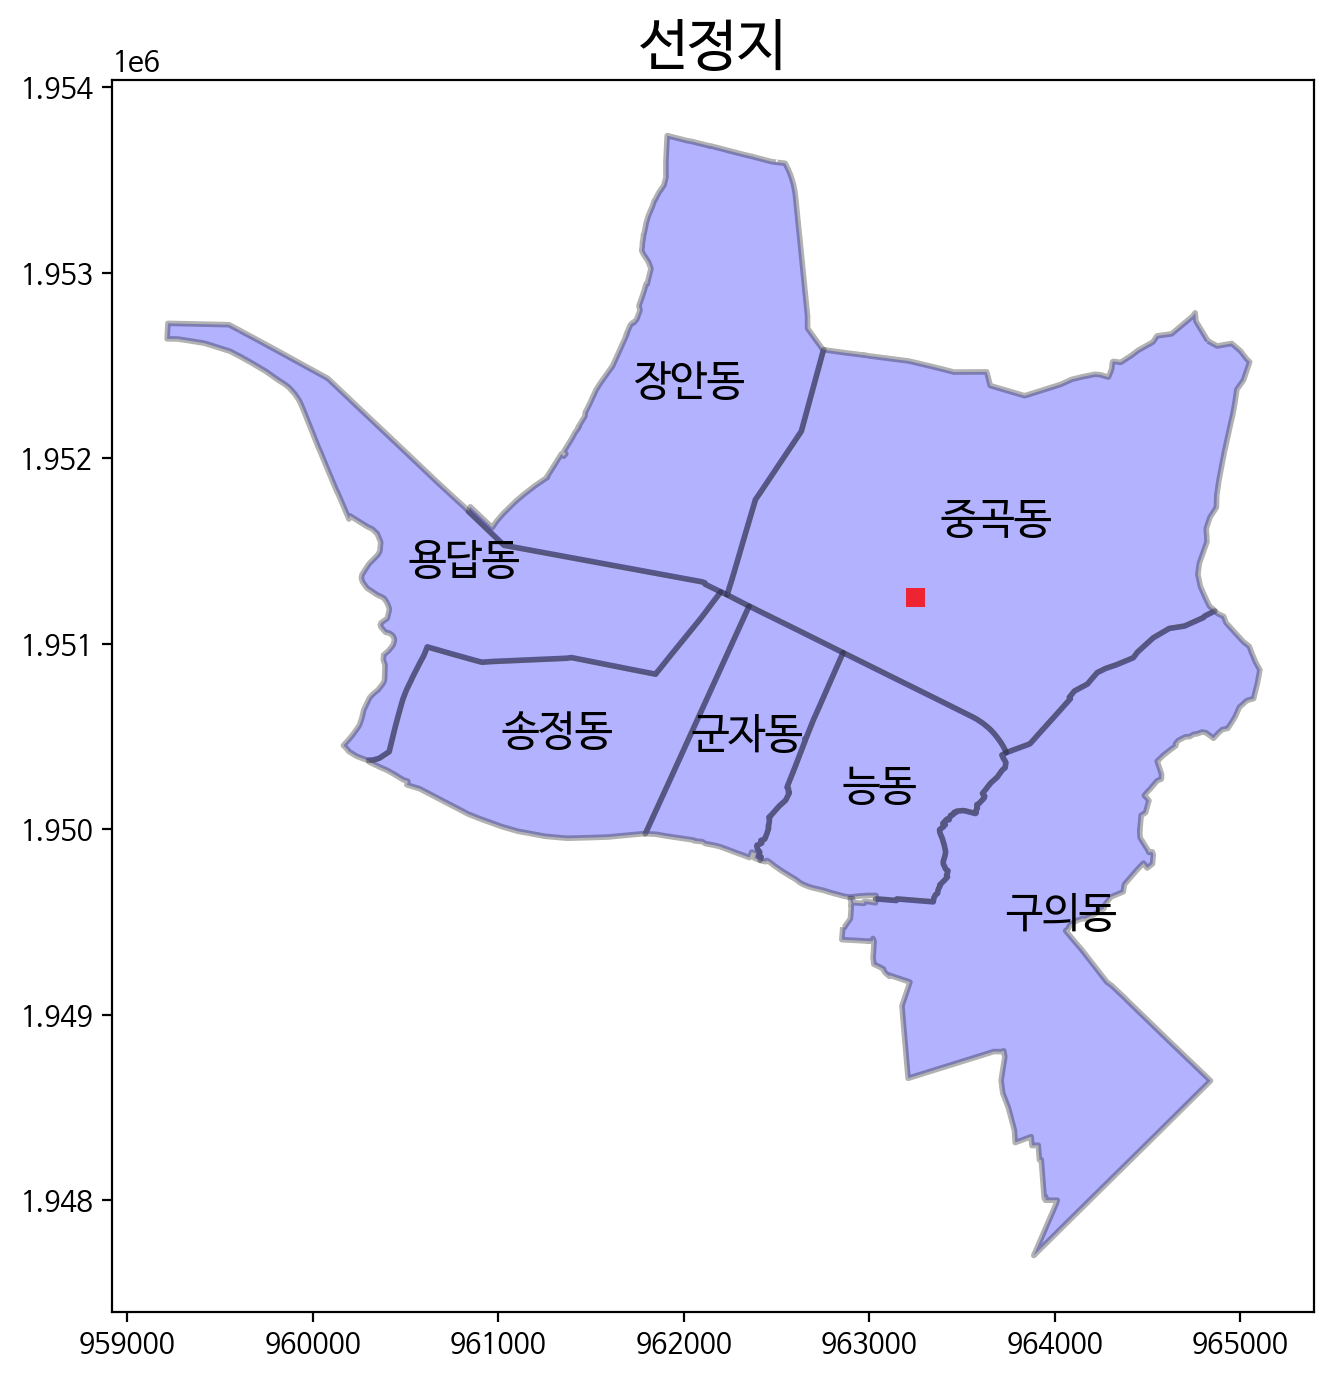

In [ ]:
temp = target

# 광진구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = whole_area.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in whole_area.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, color = 'r', alpha = .8)
plt.title('선정지', fontsize = 20)
plt.show()

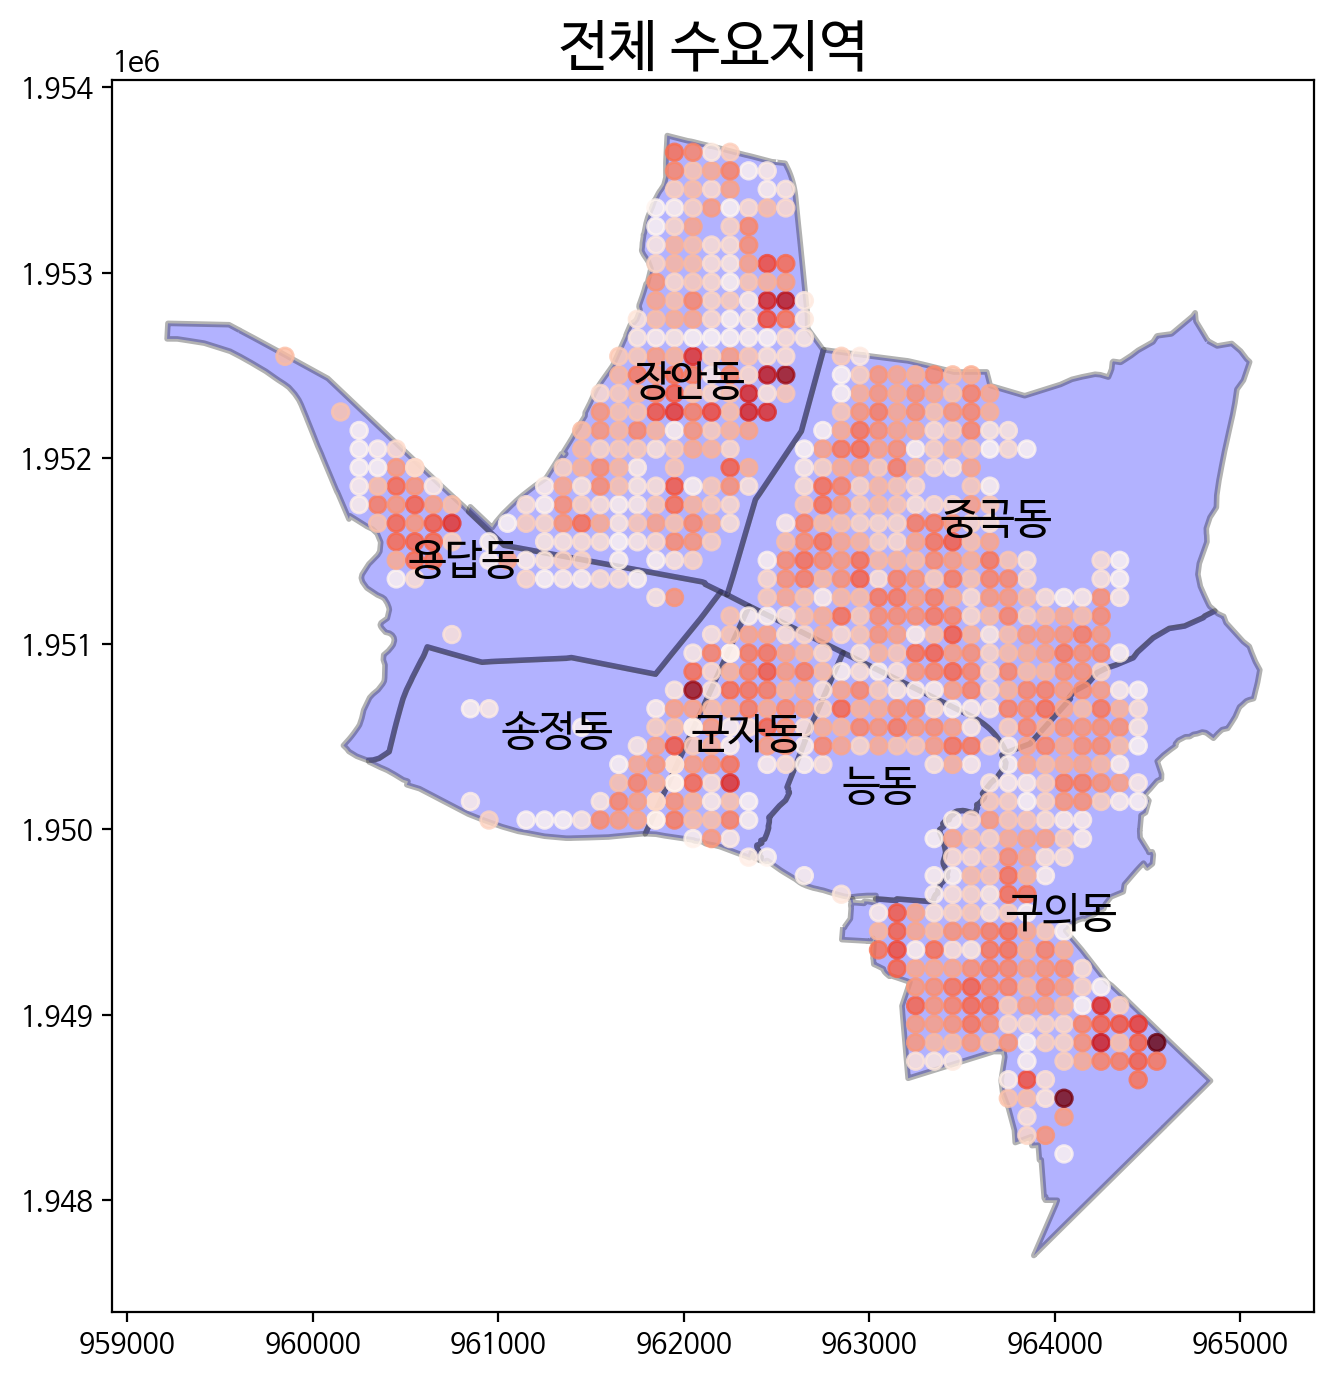

In [ ]:
temp = demandpoints

# 광진구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = whole_area.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in whole_area.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, cmap = 'Reds', column = '가중치', alpha = .8)
plt.title('전체 수요지역', fontsize = 20)
plt.show()

In [ ]:
import os
savepath = '/content/drive/MyDrive/광진구공모전/code/modelresult'
#os.mkdir(savepath)

In [ ]:
len(facilities.mclp_sol[3])

112

In [ ]:
target

,20대인구수_남자,geometry_centroid,20대인구수_여자,30대인구수_남자,30대인구수_여자,40대인구수_남자,40대인구수_여자,50대인구수_남자,50대인구수_여자,60대인구수_남자,...,공시지가,5060인구,5060여성인구,2030인구,2030_1인세대(추산),경도,위도,5060인구수,dv,mclp_sol
3,19.0,"POLYGON ((963200.000 1951200.000, 963200.000 1...",18.0,31.0,34.0,38.0,31.0,24.0,32.0,33.0,...,3219968.49,126.0,69.0,102.0,24.928044,127.083898,37.559871,126.0,y[3],"[x[19], x[26], x[314], x[323], x[341], x[345],..."


In [ ]:
temp2.sort_values('가중치', ascending = False)

,geometry,총인구수_전체,geometry_origin,5060여성인구,EMD_KOR_NM,행정동,동별(3),1인세대 비율(행정동 기준),1인가구인구수(추산),가중치,dv,mclp_sol
386,POINT (963450.000 1951050.000),663.0,"POLYGON ((963400 1951000, 963400 1951100, 9635...",110.0,중곡동,중곡2동,중곡2동,0.244393,162.032287,6.098052,x[386],[y[3]]
406,POINT (963450.000 1951550.000),599.0,"POLYGON ((963400 1951500, 963400 1951600, 9635...",117.0,중곡동,중곡2동,중곡2동,0.244393,146.391161,5.985519,x[406],[y[3]]
411,POINT (963350.000 1950950.000),609.0,"POLYGON ((963300 1950900, 963300 1951000, 9634...",110.0,중곡동,중곡2동,중곡2동,0.244393,148.835087,5.842863,x[411],[y[3]]
449,POINT (962950.000 1951350.000),558.0,"POLYGON ((962900 1951300, 962900 1951400, 9630...",93.0,중곡동,중곡1동,중곡1동,0.307079,171.350023,5.817008,x[449],[y[3]]
388,POINT (963450.000 1950850.000),632.0,"POLYGON ((963400 1950800, 963400 1950900, 9635...",99.0,중곡동,중곡2동,중곡2동,0.244393,154.456117,5.653120,x[388],[y[3]]
...,...,...,...,...,...,...,...,...,...,...,...,...
398,POINT (963250.000 1951050.000),71.0,"POLYGON ((963200 1951000, 963200 1951100, 9633...",9.0,중곡동,중곡2동,중곡2동,0.244393,17.351874,0.560245,x[398],[y[3]]
413,POINT (963350.000 1950750.000),88.0,"POLYGON ((963300 1950700, 963300 1950800, 9634...",6.0,중곡동,중곡2동,중곡2동,0.244393,21.506548,0.559191,x[413],[y[3]]
404,POINT (963550.000 1950650.000),111.0,"POLYGON ((963500 1950600, 963500 1950700, 9636...",0.0,중곡동,중곡2동,중곡2동,0.244393,27.127578,0.505100,x[404],[y[3]]
19,POINT (963050.000 1950850.000),44.0,"POLYGON ((963000 1950800, 963000 1950900, 9631...",0.0,능동,능동,능동,0.337478,14.849016,0.267674,x[19],[y[3]]


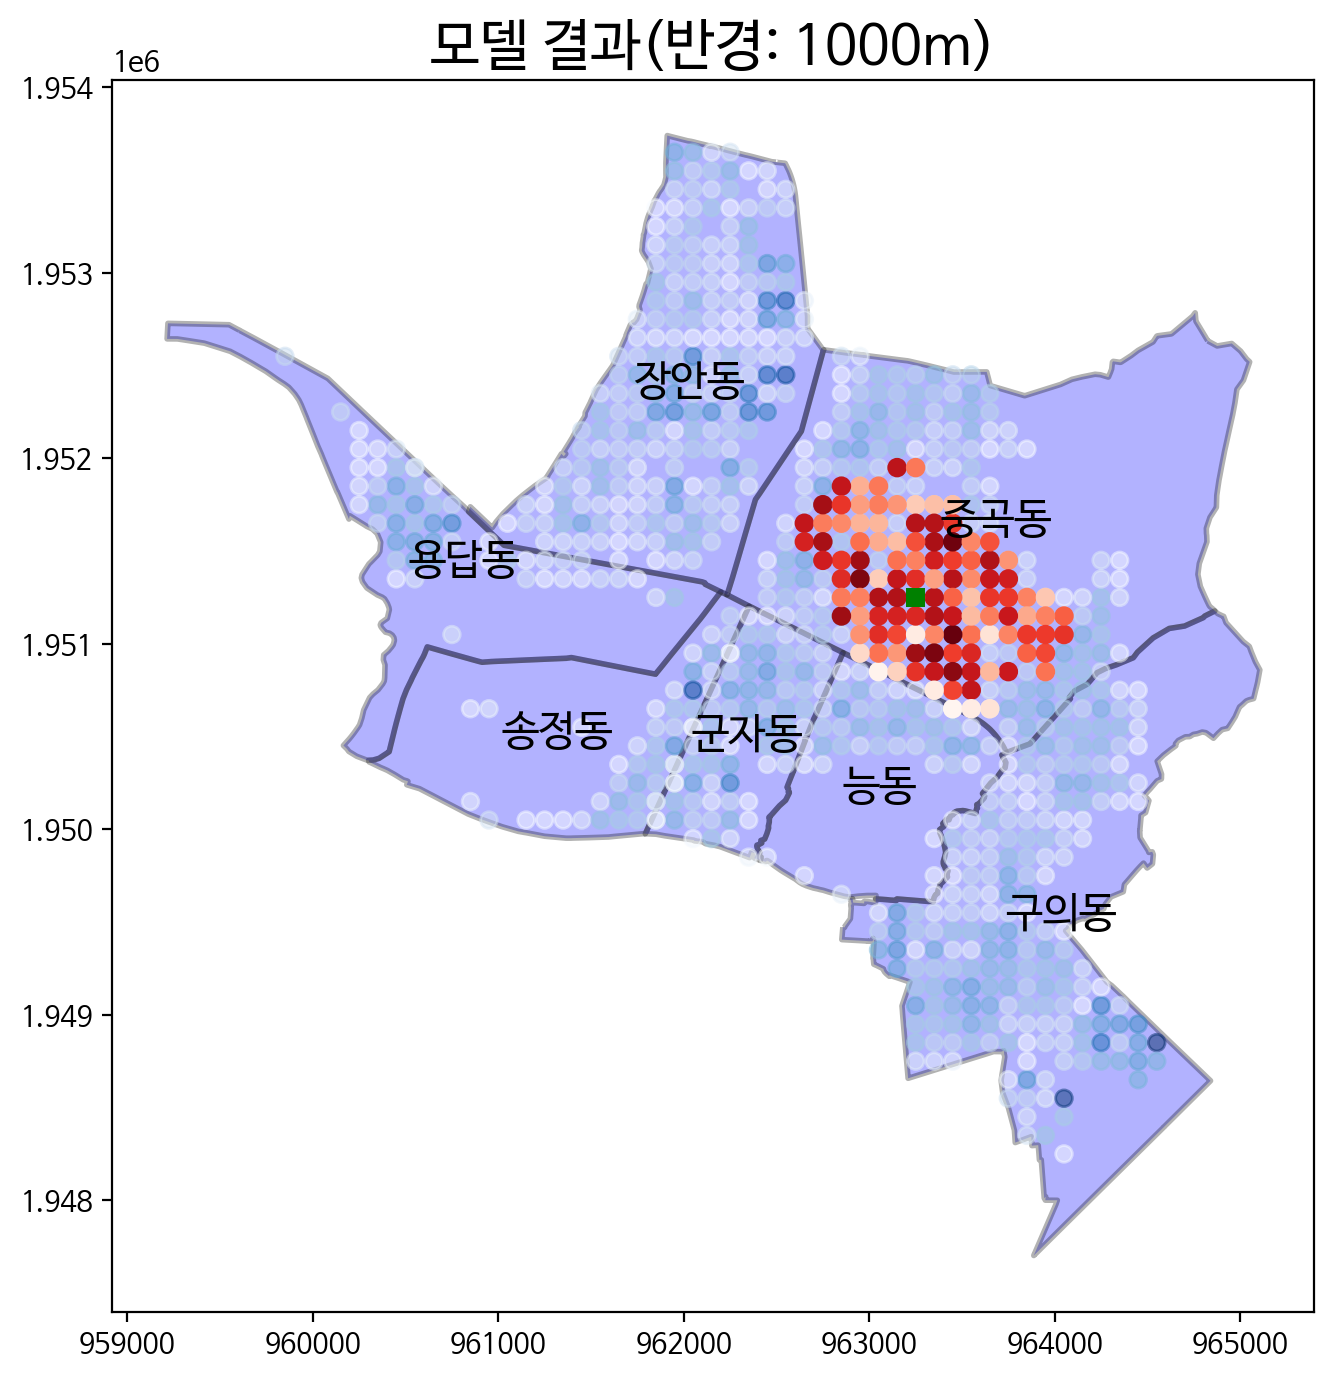

In [ ]:
road0 = road_target
temp1 = demandpoints
temp2 = clients[clients['dv'].isin(facilities.mclp_sol[3])].to_crs('epsg:5179')
temp3 = target

# 광진구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = whole_area.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in whole_area.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
#road0.plot(ax=ax, color = 'gray', alpha = .3)
temp1.plot(ax=ax, column = '가중치', cmap = 'Blues', alpha = .5)
temp2.plot(ax=ax, column = '가중치', cmap = 'Reds')
temp3.plot(ax=ax, color = 'green')

plt.title('모델 결과(반경: 1000m)', fontsize = 20)
plt.savefig(savepath+'/모델 실행결과_100m.png', dpi =300)
plt.show()

### 모델링: 전체 행정동 기반

In [ ]:
streets = road_target
whole_area = dist_target 

In [ ]:
# 4초 소요
ntw = spaghetti.Network(in_data = whole_area) # ntw는 network. 
ntw.snapobservations(clients, "clients", attribute=True) #snap == 네트워크가 있으면, 데이터를 연결시킨다
clients_snapped = spaghetti.element_as_gdf(
    ntw, pp_name="clients", snapped=True
)
ntw.snapobservations(facilities, "facilities", attribute=True) 
facilities_snapped = spaghetti.element_as_gdf(
    ntw, pp_name="facilities", snapped=True
)

# cost_matrix = ntw.allneighbordistances(
#     sourcepattern=ntw.pointpatterns["clients"],
#     destpattern=ntw.pointpatterns["facilities"],
# ) # 
# cost_matrix[:3,:3]

In [ ]:
# 11초 소요
cost_matrix = ntw.allneighbordistances(
    sourcepattern=ntw.pointpatterns["clients"],
    destpattern=ntw.pointpatterns["facilities"],
) # 
cost_matrix[:3,:3]

array([[ 415.19604169,  333.75674103,  595.51090738],
       [ 926.23555227,  844.79625161, 1106.55041795],
       [ 638.58294758,  557.14364692,  818.89781326]])

In [ ]:
cost_matrix.shape

(845, 5)

In [ ]:
# add_to_plot = {
#     "streets": streets,
#     "buffer": streets_buffer,
#     "cli_tru": clients,
#     "fac_tru": facilities,
#     "cli_snp": clients_snapped,
#     "fac_snp": facilities_snapped,
# }
# plotter(plot_aux=add_to_plot, buffered=buff, pt1_size=60, pt2_size=10)

#### MCLP

In [ ]:
mclp = FacilityLocationModel(
    "mclp", ai=clients["가중치"], cij=cost_matrix, p=1, s=1000
)
clients, facilities = add_results(mclp, clients, facilities)

Solve Time: 0.0024833383 minutes
Obj. Value: 485.8400154803247 residents within 1000.000000 meters of 1 selected facilities
Percent of 2427 clients covered: 20.015092
--- 691 clients are not covered
--- 154 clients are covered by 1 facility


In [ ]:
# aux_to_plot = {"streets": streets, "cli_tru": clients, "fac_tru": facilities}
# res_to_plot = {"cli_var": clients, "fac_var": facilities}
# plotter(
#     plot_aux=aux_to_plot,
#     plot_res=res_to_plot,
#     pt1_size=300,
#     pt2_size=60,
#     model=mclp,
#     title=title,
# )

In [ ]:
models = [mclp]
analytics_df, analytics_display = analytics_matrix(models)
selection_df, selection_display = selection_matrix(models)
display(analytics_display)
display(selection_display)
display(facilities[facilities["mclp_sol"] != "closed"][["dv", "geometry"]])

,stats,mclp
0,abs_min,0.000000
1,abs_max,998.462482
2,mean_means,606.079586
3,mean_stds,266.483869


,mclp,$\sum$,$\%$
y[0],$\in$,1.000000,25.000000
y[1],$\notin$,0.000000,0.000000
y[2],$\notin$,0.000000,0.000000
y[3],$\notin$,0.000000,0.000000
y[4],$\notin$,0.000000,0.000000


,dv,geometry
0,y[0],"POLYGON ((962700 1951400, 962700 1951500, 9628..."


#### 결과 시각화

In [ ]:
target = facilities[facilities["mclp_sol"] != "closed"]
polygon = shapely.wkt.loads(target['geometry'])
target.geometry = polygon

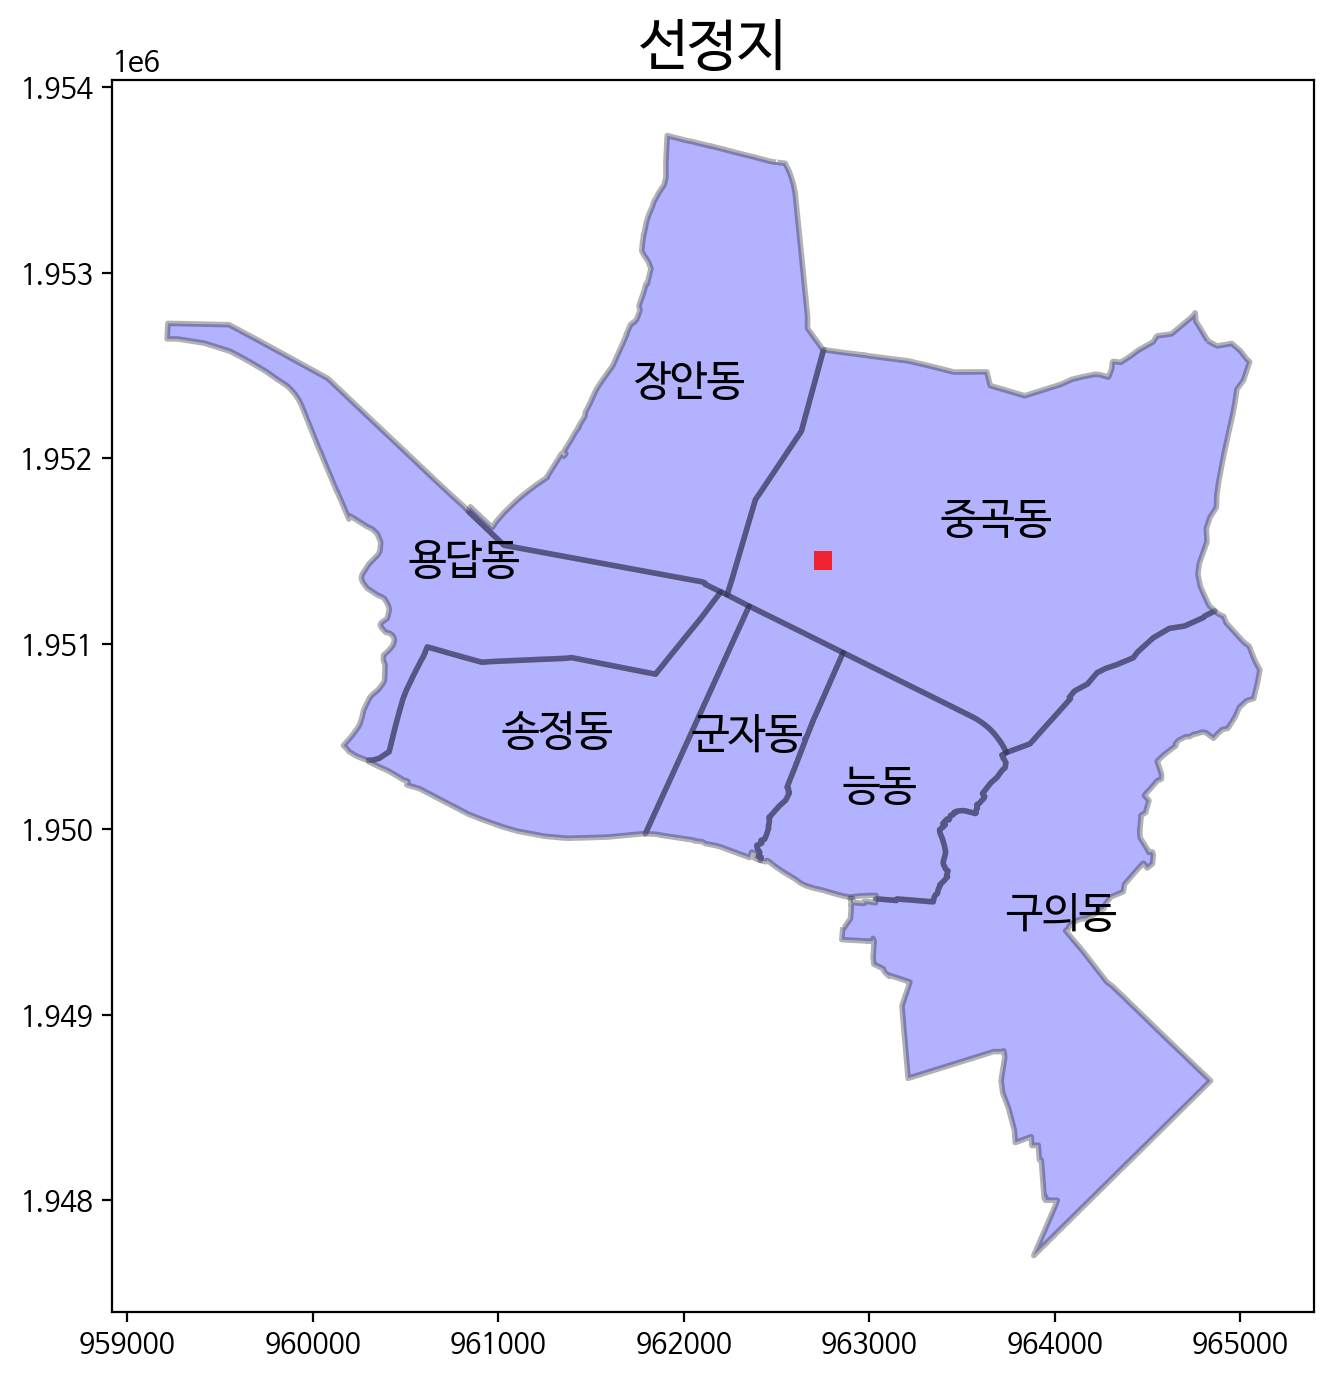

In [ ]:
temp = target

# 광진구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = whole_area.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in whole_area.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, color = 'r', alpha = .8)
plt.title('선정지', fontsize = 20)
plt.show()

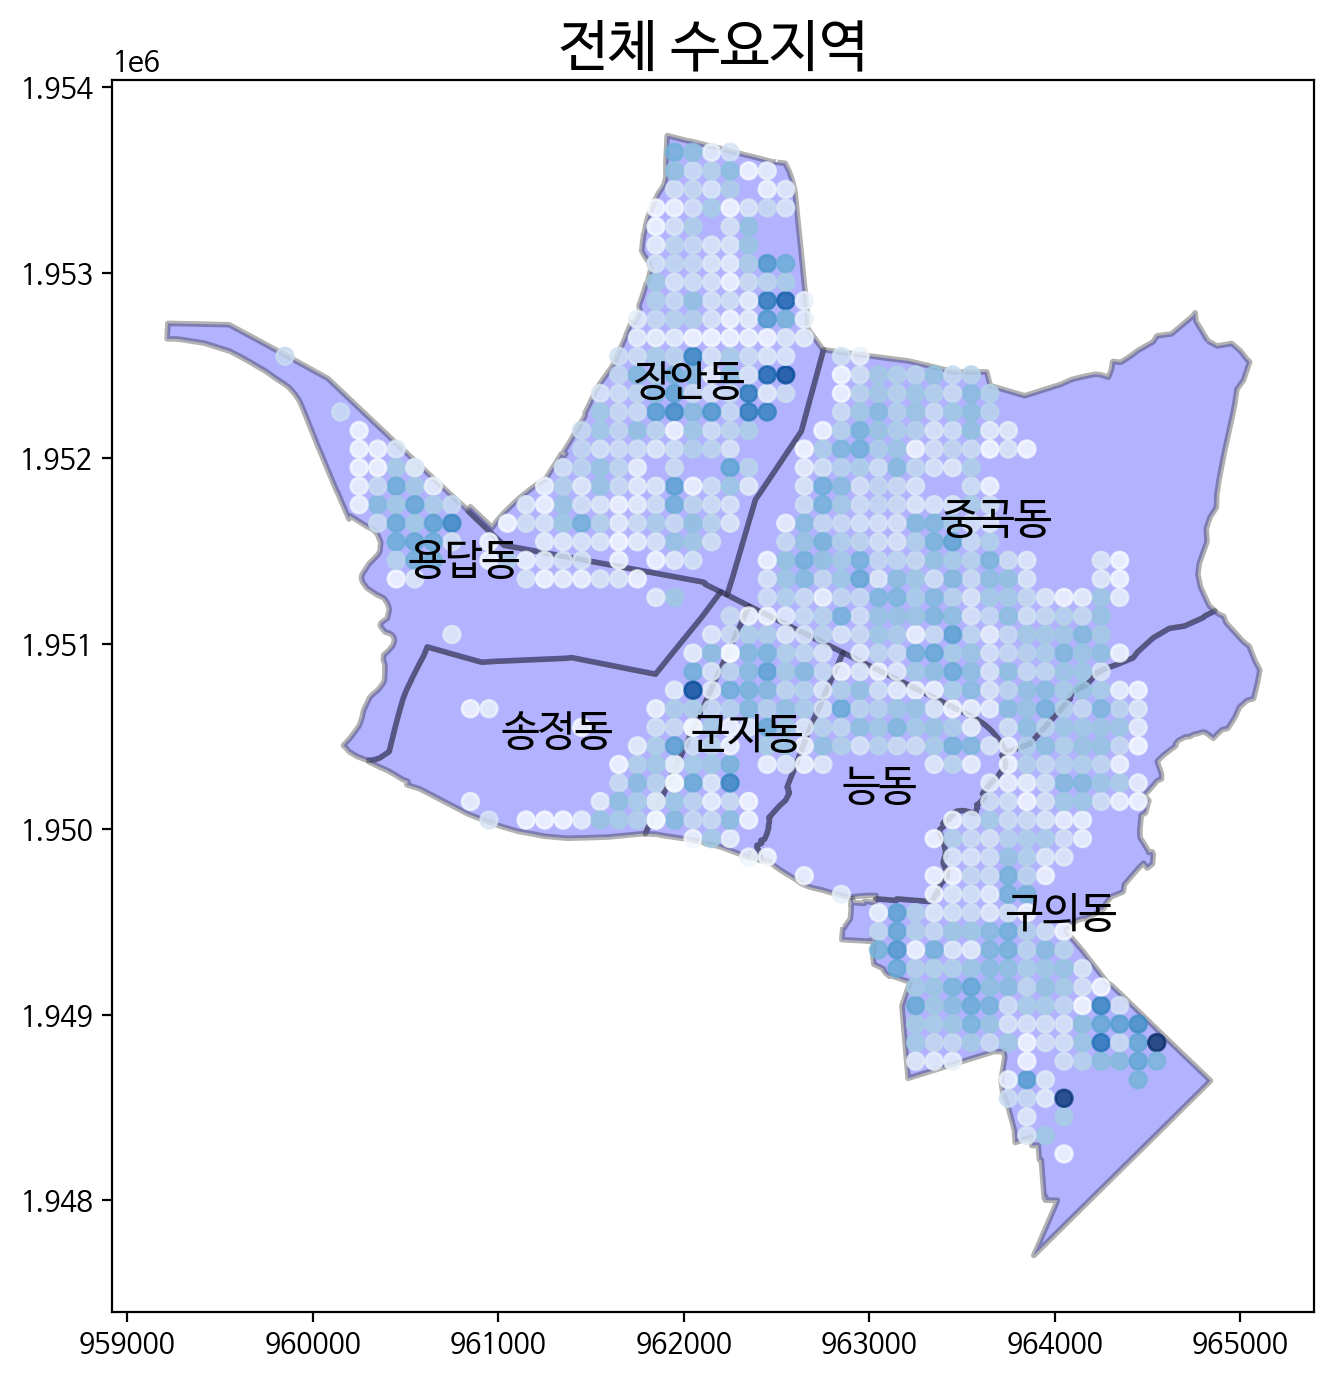

In [ ]:
temp = demandpoints

# 광진구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = whole_area.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in whole_area.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
    
temp.plot(ax=ax, cmap =  'Blues', column = '가중치', alpha = .8)
plt.title('전체 수요지역', fontsize = 20)
plt.show()

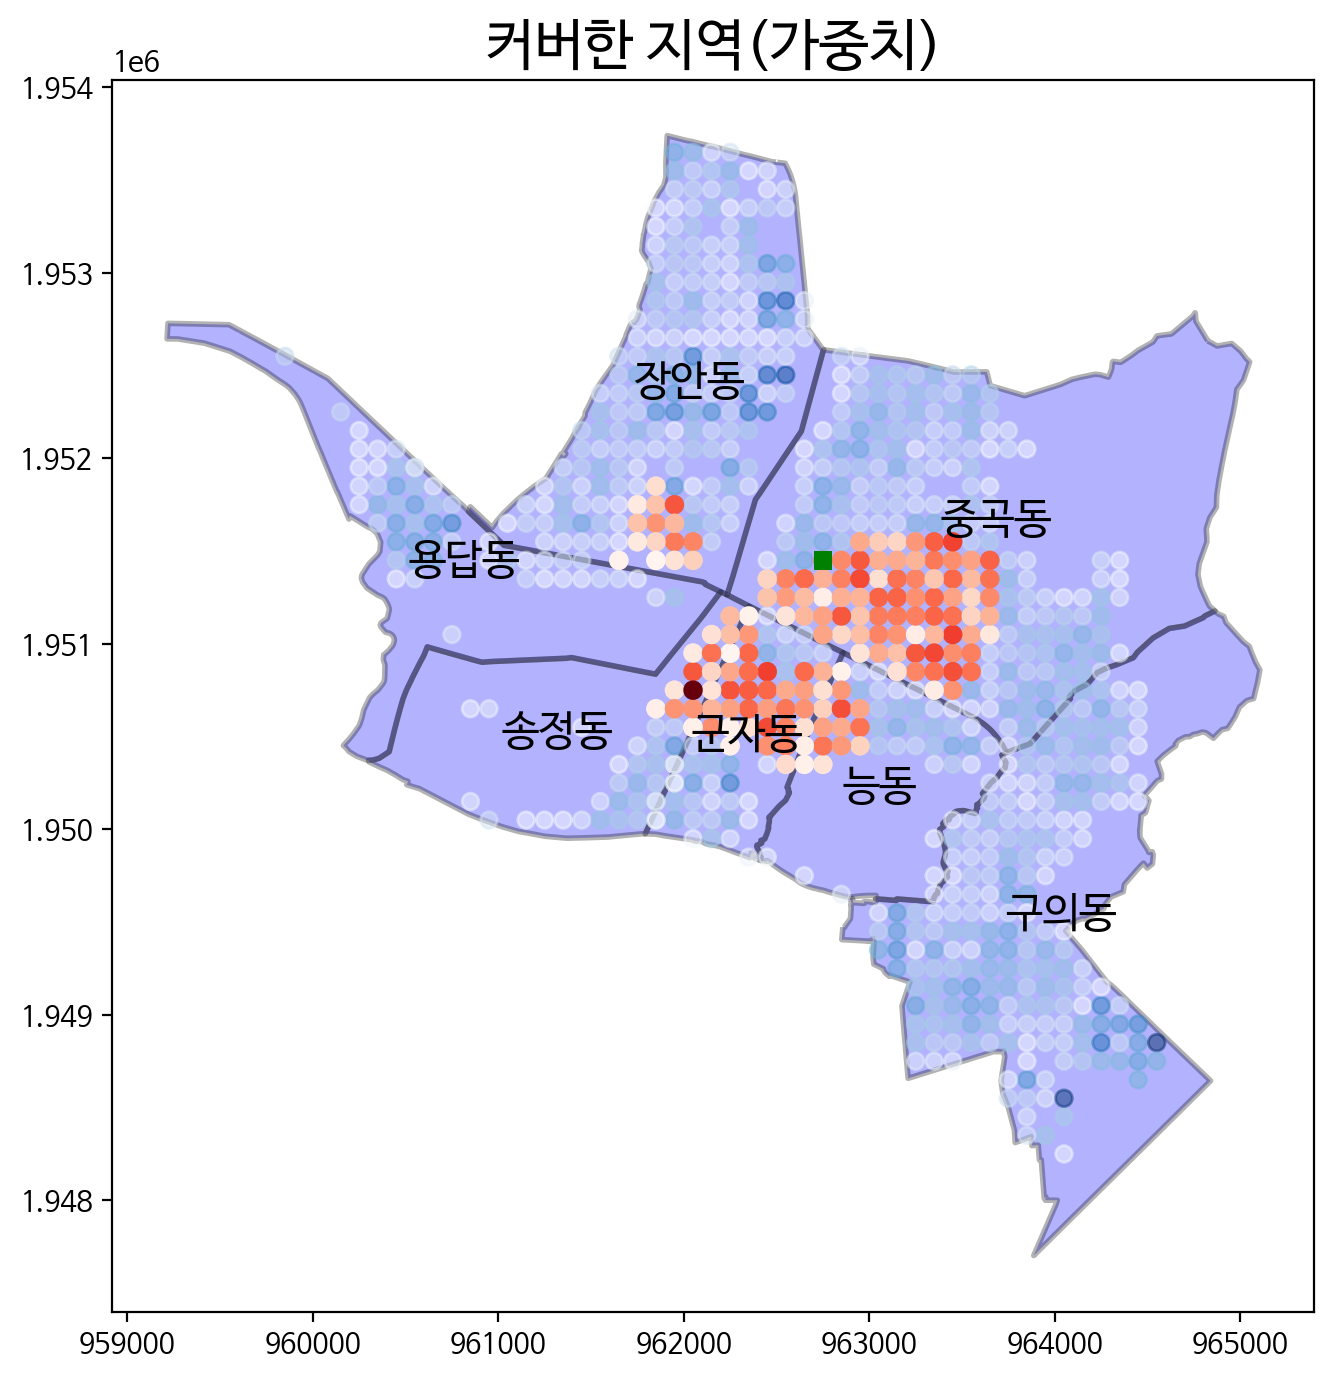

In [ ]:
temp1 = demandpoints
temp2 = clients[clients['dv'].isin(facilities.mclp_sol[0])].to_crs('epsg:5179')
temp3 = target

# 광진구 법정동 경계 지도를 ax로(배경으로) 삼아 시각화 
ax = whole_area.plot(figsize = (8,8), alpha = .3, color = 'blue')
ax.collections[0].set_linewidth(2)
ax.collections[0].set_edgecolor('black')

# 법정동명을 추가
for idx, row in whole_area.iterrows():

    centroid = row.geometry.centroid
    ax.annotate(row['EMD_KOR_NM'], xy=(centroid.x, centroid.y),
                horizontalalignment='center', verticalalignment='center', fontsize = 15)
temp1.plot(ax=ax, column = '가중치', cmap = 'Blues', alpha = .5)
temp2.plot(ax=ax, column = '가중치', cmap = 'Reds', alpha = 1)
temp3.plot(ax=ax, color = 'green')
plt.title('커버한 지역(가중치)', fontsize = 20)
plt.show()